# Fruit Image Classification using InceptionV3
This notebook is written end executed by **Dr Raheel Siddiqi** on 11-05-2019. The notebook presents an experiment to classify fruit images using *transfer learning*. [Fruits 360](https://www.kaggle.com/moltean/fruits) dataset (containing 52262 training images and 17540 test images belonging to 101 fruit classes) has been exploited for the task. The model designed uses **InceptionV3** pre-trained model as the convolutional base.
## Setting up the Model

In [12]:
from tensorflow.python.keras.applications import InceptionV3

conv_base=InceptionV3(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [13]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_94 (Batc (None, 49, 49, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 49, 49, 32)   0           batch_normalization_v1_94[0][0]  
__________________________________________________________________________________________________
conv2d_95 

In [14]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 101)               51813     
Total params: 22,903,685
Trainable params: 22,869,253
Non-trainable params: 34,432
_________________________________________________________________


## Setting up Training and Validation Data

In [7]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Training'

In [8]:
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'

In [19]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])

In [9]:
batch_size=32
number_of_training_samples=52262
number_of_test_samples=17540

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 52262 images belonging to 101 classes.
Found 17540 images belonging to 101 classes.


## Model Training

In [22]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=50,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1634/1634 [==============================] - 942s 577ms/step - loss: 0.8281 - categorical_accuracy: 0.7995 - val_loss: 0.0825 - val_categorical_accuracy: 0.9727
Epoch 2/50
1634/1634 [==============================] - 553s 338ms/step - loss: 0.1092 - categorical_accuracy: 0.9686 - val_loss: 0.0581 - val_categorical_accuracy: 0.9846
Epoch 3/50
1634/1634 [==============================] - 544s 333ms/step - loss: 0.0757 - categorical_accuracy: 0.9783 - val_loss: 0.0485 - val_categorical_accuracy: 0.9835
Epoch 4/50
1634/1634 [==============================] - 1776s 1s/step - loss: 0.0654 - categorical_accuracy: 0.9819 - val_loss: 0.0460 - val_categorical_accuracy: 0.9863
Epoch 5/50
1634/1634 [==============================] - 541s 331ms/step - loss: 0.0584 - categorical_accuracy: 0.9838 - val_loss: 0.0257 - val_categorical_accuracy: 0.9929
Epoch 6/50
1634/1634 [==============================] - 539s 330ms/step - loss: 0.0468 - categ

1634/1634 [==============================] - 472s 289ms/step - loss: 0.0091 - categorical_accuracy: 0.9975 - val_loss: 0.0872 - val_categorical_accuracy: 0.9930
Epoch 50/50
1634/1634 [==============================] - 446s 273ms/step - loss: 0.0091 - categorical_accuracy: 0.9975 - val_loss: 0.3817 - val_categorical_accuracy: 0.9673


In [23]:
import matplotlib.pyplot as plt

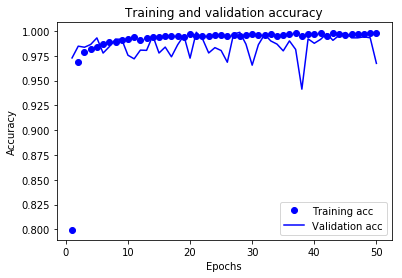

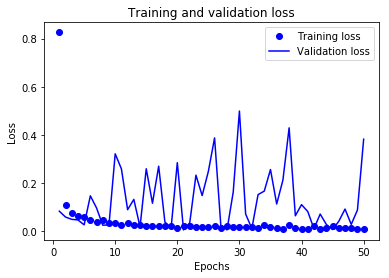

In [24]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_InceptionV3_data augmentation_a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_InceptionV3_data augmentation_b',format='png')
plt.show()

## Model Evaluation

In [25]:
steps_test=int(17540/32)
print(steps_test)

548


In [26]:
result = model.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 96.73%


## Saving and Reloading the Model

In [27]:
from tensorflow.python.keras.models import load_model

model.save('InceptionV3_fruit_image_classification_model_101_classes.h5')  # creates a HDF5 file 
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_copy = load_model('InceptionV3_fruit_image_classification_model_101_classes.h5')

In [5]:
from tensorflow.python.keras.models import load_model
import os
import numpy as np
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# returns a compiled model
# identical to the previous one
model_copy = load_model('InceptionV3_fruit_image_classification_model_101_classes.h5')

In [12]:
steps_test=int(17540/32)
print(steps_test)

548


In [13]:
result = model_copy.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 96.73%


## Tensorflow and Keras version used

In [14]:
import tensorflow as tf
from tensorflow.python import keras

print('Tensorflow Version: ', tf.__version__)
print('Keras Version: ', keras.__version__)

Tensorflow Version:  1.13.1
Keras Version:  2.2.4-tf


## Predicting labels for Fruit Images

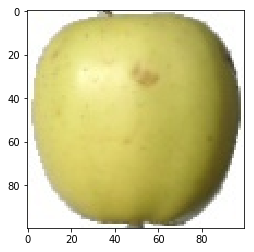

1/1 [==============================] - 0s 23ms/sample
True label: Apple Golden 2
Predicted label: Apple Golden 2


In [25]:
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline

TEST_DIR='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'
CATEGORIES=[]
for category in os.listdir(TEST_DIR):
    CATEGORIES.append(category)
img_array = cv2.imread('99_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = model_copy.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Apple Golden 2')
print('Predicted label:',pred_name)

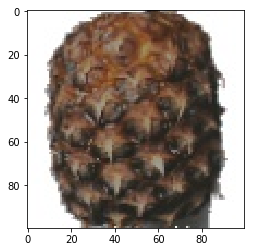

1/1 [==============================] - 0s 24ms/sample
True label: Pineapple
Predicted label:  Pineapple


In [21]:
img_array = cv2.imread('214_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = model_copy.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Pineapple')
print('Predicted label: ',pred_name)

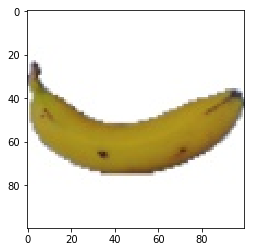

1/1 [==============================] - 0s 23ms/sample
True label: Banana
Predicted label:  Banana


In [22]:
img_array = cv2.imread('110_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = model_copy.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Banana')
print('Predicted label: ',pred_name)

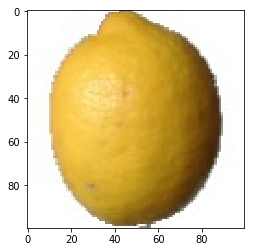

1/1 [==============================] - 0s 24ms/sample
True label: Lemon
Predicted label:  Lemon


In [23]:
img_array = cv2.imread('63_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = model_copy.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Lemon')
print('Predicted label: ',pred_name)

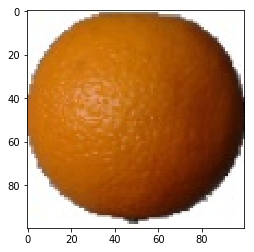

1/1 [==============================] - 0s 23ms/sample
True label: Orange
Predicted label:  Orange


In [26]:
img_array = cv2.imread('60_100.jpg')  
img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array=img_array.astype(np.float32)/255.
plt.imshow(img_array)  
plt.show()
test_data=np.array([img_array])
prediction = model_copy.predict(test_data,verbose=1)
pred_name = CATEGORIES[np.argmax(prediction)]
print('True label: Orange')
print('Predicted label: ',pred_name)